In [197]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [198]:
data = pd.read_csv("./patients.csv")
data.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   gender          303 non-null    int64
 2   pain            303 non-null    int64
 3   blood_pressure  303 non-null    int64
 4   cholesterol     303 non-null    int64
 5   blood_sugar     303 non-null    int64
 6   heart_rate      303 non-null    int64
 7   exercise        303 non-null    int64
 8   outcome         303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [200]:
data.describe()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


In [217]:
data.dtypes

age               int64
gender            int64
pain              int64
blood_pressure    int64
cholesterol       int64
blood_sugar       int64
heart_rate        int64
exercise          int64
outcome           int64
dtype: object

<AxesSubplot:>

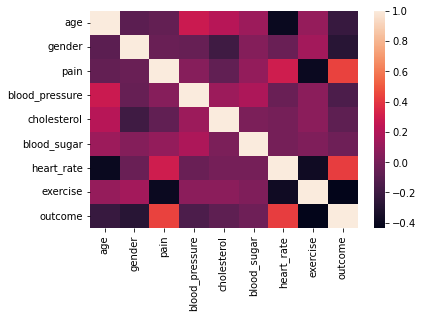

In [204]:
sns.heatmap(data.corr())

In [205]:

# Calculating correlation between outcome and other variables
data.corr()['outcome'][["age","gender","pain","blood_pressure","cholesterol","blood_sugar","heart_rate","exercise",]]

corrs

age              -0.225439
gender           -0.280937
pain              0.433798
blood_pressure   -0.144931
cholesterol      -0.085239
blood_sugar      -0.028046
heart_rate        0.421741
exercise         -0.436757
Name: outcome, dtype: float64

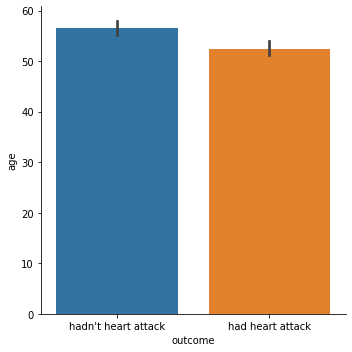

In [206]:
a = sns.catplot(
        data=data,
        y="age", x="outcome", 
        kind="bar")

a.set_xticklabels([ "hadn't heart attack","had heart attack"])
plt.show()

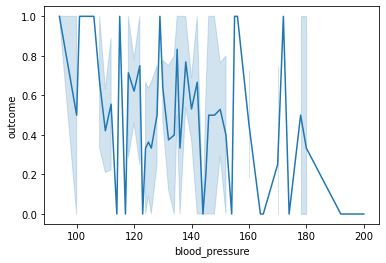

In [207]:
sns.lineplot(data=data, x="blood_pressure", y="outcome")
plt.show()

In [208]:
# list of columns which will be removed from training.
target_col = ['outcome']

X = data.drop( target_col , axis=1)
Y = data.outcome

# split the dataset into training(75%) and testing(25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0) 


In [209]:
# Create the model
model = LogisticRegression()

# build the model
model.fit(X_train, Y_train)

# predict the model with testing data 
Y_test_predction = model.predict(X_test)


accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
best_accuracy = accuracy
best_predictor = "LogisticRegression"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)

Train data accuracy: 0.8061674008810573
Test data accuracy: 0.7763157894736842


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
# Create Decision Tree classifer object

fractions = [0,0.1,0.2101,0.3,0.4,0.5]

best_accuracy = 0
fraction_no = 0
model

for i in fractions:

    model = DecisionTreeClassifier(criterion='entropy', splitter='random', min_weight_fraction_leaf=i, random_state=None)
    model = model.fit(X_train,Y_train)
    Y_test_predction = model.predict(X_test)
    score = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
    if best_accuracy < score:
        best_accuracy = score
        fraction_no = i


print(f"fraction is {fraction_no}")
model = DecisionTreeClassifier(criterion='entropy',splitter='random', min_weight_fraction_leaf=fraction_no, random_state=None)

model = model.fit(X_train,Y_train)
Y_test_predction = model.predict(X_test)

accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)

### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "DecisionTreeClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)
    

fraction is 0.4
Train data accuracy: 0.7577092511013216
Test data accuracy: 0.7631578947368421


In [211]:
bagg = BaggingClassifier(
                            base_estimator=SVC(), 
                            n_estimators=100,
                            max_samples=100,
                            random_state=1, 
                            n_jobs=3
                        )
model = bagg.fit(X_train, Y_train)
Y_test_predction = model.predict(X_test)

accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "BaggingClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)

Train data accuracy: 0.6123348017621145
Test data accuracy: 0.7105263157894737


In [212]:
model =RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

Y_test_predction = model.predict(X_test)


accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "RandomForestClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)
    

Train data accuracy: 1.0
Test data accuracy: 0.7631578947368421


In [213]:
print(f"Best predictor {best_predictor}")
print(f"Best accuracy {best_accuracy}")

Best predictor LogisticRegression
Best accuracy 0.7631578947368421


In [214]:
# last

In [215]:

# list of columns which will be removed from training.
target_col = ['outcome']

X = data[["age","pain", "blood_sugar", "blood_pressure"]]
Y = data.outcome

# split the dataset into training(75%) and testing(25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0) 

fractions = [0,0.1,0.18,0.25,0.3,0.4,0.5]

best_accuracy = 0
fraction_no = 0
model

for i in fractions:

    model = DecisionTreeClassifier(criterion='gini', splitter='best', min_weight_fraction_leaf=i, random_state=0)
    model = model.fit(X_train,Y_train)
    Y_test_predction = model.predict(X_test)
    score = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
    if best_accuracy < score:
        best_accuracy = score
        fraction_no = i


print(f"fraction is {fraction_no}")
model = DecisionTreeClassifier(criterion='gini',splitter='best', min_weight_fraction_leaf=fraction_no, random_state=0)

model = model.fit(X_train,Y_train)
Y_test_predction = model.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))
    

fraction is 0.1
Train data accuracy: 0.7577092511013216
Test data accuracy: 0.7631578947368421
